In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, mean_absolute_error, mean_absolute_percentage_error
import optuna
from catboost import CatBoostRegressor, CatBoostClassifier
import math
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task

c:\Users\ignat\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'nlp' extra dependecy package 'nltk' isn't installed. Look at README.md in repo 'LightAutoML' for installation instructions.
'nlp' extra dependecy package 'transformers' isn't installed. Look at README.md in repo 'LightAutoML' for installation instructions.
'nlp' extra dependecy package 'nltk' isn't installed. Look at README.md in repo 'LightAutoML' for installation instructions.
'nlp' extra dependecy package 'transformers' isn't installed. Look at README.md in repo 'LightAutoML' for installation instructions.


C:\Users\ignat\AppData\Roaming\Python\Python311\site-packages\lightautoml\ml_algo\dl_model.py:42: UserWarning: 'transformers' - package isn't installed
  warnings.warn("'transformers' - package isn't installed")
C:\Users\ignat\AppData\Roaming\Python\Python311\site-packages\lightautoml\text\embed.py:22: UserWarning: 'transformers' - package isn't installed
  warnings.warn("'transformers' - package isn't installed")
C:\Users\ignat\AppData\Roaming\Python\Python311\site-packages\lightautoml\text\dl_transformers.py:25: UserWarning: 'transformers' - package isn't installed
  warnings.warn("'transformers' - package isn't installed")


In [2]:
df_train = pd.read_parquet("train.parquet")

In [87]:
df_train.head()

,event_timestamp,user_id,region,city,video_id,watchtime
0,2024-08-10 20:13:12+03:00,73dadec9-9189-43a8-a32f-906e549af7e0,13925c13-0e77-4548-acdc-09aa728e31d4,faeecbed-060a-4d40-be81-ce3bac90804c,98380888-2d8a-4d2f-9660-a00c3c5c0512,0
1,2024-08-10 08:43:24+03:00,314f3f16-d606-4b19-a565-5197f35b4297,d7c6be26-f823-4c5e-83fc-c1446ef917a9,e8856e8a-e3db-4780-843c-b18d1426f0b8,bc1d8afb-ed43-41da-a7e3-40d195b1295b,304
2,2024-08-10 14:31:13+03:00,d8ab4c2f-42e8-4d86-861d-3ad7f1a0e976,243942ba-d0ce-4753-9432-3ed1ba4ae70b,f5343b37-2438-43ac-b98a-b984a38858ef,80a741ad-d2be-445e-90ad-80b345ef8697,0
3,2024-08-10 15:26:14+03:00,874efe8e-eee2-41a6-97bc-3ef0f6d87276,7d0eb6c0-242f-404b-a862-bc6630ddb4b3,78d7f303-b196-4da1-b893-9928c424d20a,34de4313-608a-4bdf-8e7b-6afa2c333247,0
4,2024-08-10 23:10:33+03:00,6478e986-4691-47f9-a0a6-7051550abadc,7d0eb6c0-242f-404b-a862-bc6630ddb4b3,78d7f303-b196-4da1-b893-9928c424d20a,5d2918ad-e728-4a94-a516-d2d91532c9f9,690


In [3]:
df_video_stat = pd.read_parquet("video_stat.parquet")

In [6]:
df_video_stat.head()

,video_id,v_pub_datetime,v_total_comments,v_year_views,v_month_views,v_week_views,v_day_views,v_likes,v_dislikes,v_duration,...,v_category_popularity_percent_7_days,v_category_popularity_percent_30_days,v_long_views_1_days,v_long_views_7_days,v_long_views_30_days,row_number,title,description,category_id,author_id
0,5b98a8f2-99b6-4730-b3a2-33fc6791eefd,2009-12-31 21:00:01,0,18947,23,23,23,62,6,42.025,...,0.917423,0.917423,6,6,6,1,найк,найк дрессура,Животные,e4bf220f-3c8a-4804-88ee-8f76303a0415
1,3250d9f7-fcb9-4706-b268-50da82c70884,2023-11-29 13:49:46,0,137,3,3,3,0,0,695.647,...,9.614708,9.614708,0,0,0,1,SHACMAN. Шакман замена двухрядного подшипника ...,,Разное,2b45f16a-cdf8-4b46-931d-5ce72a0d592f
2,87b740dd-6231-4e65-bbaa-b7cb505d4f5c,2023-08-11 09:52:41,0,276,14,14,14,4,0,366.806,...,1.669248,1.669248,10,10,10,1,"Как правильно заряжать электросамокат, сколько...",подписаться на канал плейлист. Электрические ...,Разное,75161fd2-e27b-4718-b954-4847df8fb7a3
3,6b12683b-314f-4db5-9c31-2c924bc8e69a,2022-05-21 18:39:29,1,5789,373,373,373,12,5,280.729,...,1.073461,1.073461,233,233,233,1,Фиорентина - Ювентус. Обзор матча 21.05.2022,Смотри лучший спортивный контент в одном месте...,Спорт,2b2690f5-ea02-47b1-8a4f-3e16e48893ad
4,621064d2-4323-438c-838b-27ace64e46cc,2020-03-19 08:23:24,0,116,6,6,6,5,0,1097.421,...,6.377373,6.377373,0,0,0,1,✈️ ИСТОРИЯ в Самолёте! Секретная КОНЦОВКА ЛАГЕ...,Играем в Роблокс (Roblox) - ✈️ ИСТОРИЯ в Самол...,Детям,1fe85ba0-8214-4f41-98fa-c60ae3ae4645


In [103]:
df_video_stat['category_id'].nunique()

40

In [104]:
df_train.shape

(14154564, 6)

In [105]:
df_video_stat.shape

(408484, 43)

In [106]:
df_train['user_id'].nunique()

1945108

In [4]:
df_test = pd.read_parquet("test.parquet")

In [8]:
df_test.shape

(1334132, 5)

In [109]:
df_train.describe()

,watchtime
count,1.415456e+07
mean,7.452534e+02
std,1.346294e+05
min,0.000000e+00
25%,1.100000e+01
50%,1.900000e+02
75%,7.920000e+02
max,5.064522e+08


In [110]:
df_train.dtypes

event_timestamp    datetime64[ns, Europe/Moscow]
user_id                                   object
region                                    object
city                                      object
video_id                                  object
watchtime                                  int64
dtype: object

In [111]:
df_video_stat.dtypes

video_id                                         object
v_pub_datetime                           datetime64[ms]
v_total_comments                                 uint64
v_year_views                                     uint64
v_month_views                                    uint64
v_week_views                                     uint64
v_day_views                                      uint64
v_likes                                          uint64
v_dislikes                                       uint64
v_duration                                      float64
v_cr_click_like_7_days                          float64
v_cr_click_dislike_7_days                       float64
v_cr_click_vtop_7_days                          float64
v_cr_click_long_view_7_days                     float64
v_cr_click_comment_7_days                       float64
v_cr_click_like_30_days                         float64
v_cr_click_dislike_30_days                      float64
v_cr_click_vtop_30_days                         

In [5]:
df_train = df_train[df_train['watchtime'] < 1e4]

In [113]:
df_train.shape

(14132352, 6)

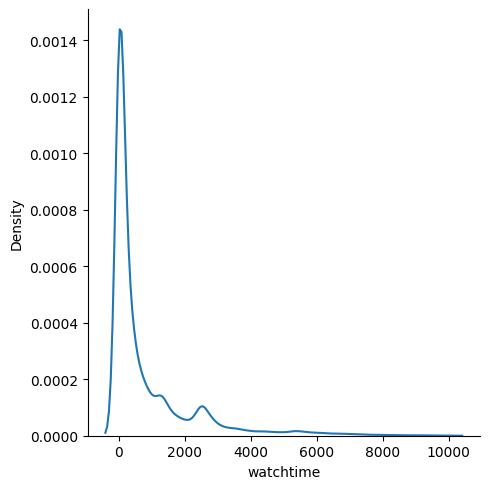

In [114]:
sns.displot(df_train['watchtime'].iloc[0:100000], kind='kde')
plt.show()

In [115]:
df_train.describe()

,watchtime
count,1.413235e+07
mean,6.838551e+02
std,1.175760e+03
min,0.000000e+00
25%,1.100000e+01
50%,1.880000e+02
75%,7.880000e+02
max,9.999000e+03


In [6]:
df_test_merged = pd.merge(df_test, df_video_stat, on="video_id")

NameError: name 'df_test' is not defined

In [6]:
df_train_merged = pd.merge(df_train, df_video_stat, on="video_id")
df_test_merged = pd.merge(df_test, df_video_stat, on="video_id")
df_train_merged.head()

,event_timestamp,user_id,region,city,video_id,watchtime,v_pub_datetime,v_total_comments,v_year_views,v_month_views,...,v_category_popularity_percent_7_days,v_category_popularity_percent_30_days,v_long_views_1_days,v_long_views_7_days,v_long_views_30_days,row_number,title,description,category_id,author_id
0,2024-08-10 20:13:12+03:00,73dadec9-9189-43a8-a32f-906e549af7e0,13925c13-0e77-4548-acdc-09aa728e31d4,faeecbed-060a-4d40-be81-ce3bac90804c,98380888-2d8a-4d2f-9660-a00c3c5c0512,0,2023-11-14 14:35:33,282,13178,3104,...,9.614708,9.614708,1750,1750,1750,1,САМЫЕ ПОПУЛЯРНЫЕ МАЙНКРАФТ ШОРТСЫ НА ЮТУБЕ!!!,▶️ МОЙ БОТ ДЛЯ ДОНАТА В ИГРЫ - ▶️ Telegram - ▶...,Лайфстайл,92730768-b602-4905-8ac0-d9b592f99bfd
1,2024-08-10 14:01:33+03:00,41f61d78-7fa8-43f1-82a6-00a8f6dff97f,7b68bf56-4b73-44a9-a16e-9b0314fccf48,ed738b3d-622d-43bc-8e13-62f13399b698,98380888-2d8a-4d2f-9660-a00c3c5c0512,38,2023-11-14 14:35:33,282,13178,3104,...,9.614708,9.614708,1750,1750,1750,1,САМЫЕ ПОПУЛЯРНЫЕ МАЙНКРАФТ ШОРТСЫ НА ЮТУБЕ!!!,▶️ МОЙ БОТ ДЛЯ ДОНАТА В ИГРЫ - ▶️ Telegram - ▶...,Лайфстайл,92730768-b602-4905-8ac0-d9b592f99bfd
2,2024-08-10 10:04:41+03:00,33561547-5f57-4e32-8929-7d6a05e4b6a4,7d0eb6c0-242f-404b-a862-bc6630ddb4b3,78d7f303-b196-4da1-b893-9928c424d20a,98380888-2d8a-4d2f-9660-a00c3c5c0512,1319,2023-11-14 14:35:33,282,13178,3104,...,9.614708,9.614708,1750,1750,1750,1,САМЫЕ ПОПУЛЯРНЫЕ МАЙНКРАФТ ШОРТСЫ НА ЮТУБЕ!!!,▶️ МОЙ БОТ ДЛЯ ДОНАТА В ИГРЫ - ▶️ Telegram - ▶...,Лайфстайл,92730768-b602-4905-8ac0-d9b592f99bfd
3,2024-08-10 00:34:38+03:00,a817239d-baf1-4e1e-9870-f9a904247321,c177434f-aa21-4800-9f97-5dbcffc5023c,660a1afb-39ad-42b3-9741-f9a885cdd4a9,98380888-2d8a-4d2f-9660-a00c3c5c0512,1440,2023-11-14 14:35:33,282,13178,3104,...,9.614708,9.614708,1750,1750,1750,1,САМЫЕ ПОПУЛЯРНЫЕ МАЙНКРАФТ ШОРТСЫ НА ЮТУБЕ!!!,▶️ МОЙ БОТ ДЛЯ ДОНАТА В ИГРЫ - ▶️ Telegram - ▶...,Лайфстайл,92730768-b602-4905-8ac0-d9b592f99bfd
4,2024-08-10 03:25:08+03:00,e9447ffc-a4c1-4a32-a604-cdd576ee8635,8a1576ff-110b-4850-b298-6a00f369d973,a196ac61-fd1a-4269-918b-ffe2cc2a9519,98380888-2d8a-4d2f-9660-a00c3c5c0512,1420,2023-11-14 14:35:33,282,13178,3104,...,9.614708,9.614708,1750,1750,1750,1,САМЫЕ ПОПУЛЯРНЫЕ МАЙНКРАФТ ШОРТСЫ НА ЮТУБЕ!!!,▶️ МОЙ БОТ ДЛЯ ДОНАТА В ИГРЫ - ▶️ Telegram - ▶...,Лайфстайл,92730768-b602-4905-8ac0-d9b592f99bfd


In [9]:
def to_classes_osn(df: pd.DataFrame) -> pd.DataFrame:
	df = df.copy()
	new_colon = []
	for i in range(df.shape[0]):
		if df['v_duration'].iloc[i] > 5 * 60:
			new_colon.append(1 if df['watchtime'].iloc[i] / df['v_duration'].iloc[i] > 0.25 else 0)
		else:
			new_colon.append(1 if df['watchtime'].iloc[i] > 30 else 0)
	print(new_colon[-1])
	df['target'] = new_colon
	return df


In [98]:
df_train_merged = to_classes_osn(df_train_merged)


1


In [16]:
df_train_merged['city'].nunique()

3844

In [97]:
df_train_merged = df_train_merged.sample(frac=1)

In [13]:
del df_video_stat
del df_train
del df_test

In [14]:
del df_test_merged

In [15]:
del df_train_merged

In [99]:
df_users_info = df_train.groupby('user_id').agg(
	mean_user_watchtime=('watchtime', 'mean')
).reset_index()
df_users_info.head()

,user_id,mean_user_watchtime
0,00000a62-336d-4b71-bb8b-991c877ac678,403.7
1,00001f1b-b571-494a-a3cf-2635c5090e1e,290.0
2,000027a1-8e92-44bf-8f8c-cbec319bc2c9,285.1
3,000034d7-444c-4824-a395-95c85beeafbc,0.1
4,00003946-b8ea-4947-a1ea-b59cbba0d65d,22.0


In [14]:
df_users_info['user_id'].isin(df_test_merged['user_id']).sum()

165859

In [15]:
df_test_merged['user_id'].nunique()

165859

### Следовательно все юзеры из трейна есть в тесте

In [101]:
df_long_views = df_train[df_train['watchtime'] > 30].groupby('user_id').agg(
	user_long_views=('watchtime', 'count')
).reset_index()
df_long_views.head()

,user_id,user_long_views
0,00000a62-336d-4b71-bb8b-991c877ac678,20
1,00001f1b-b571-494a-a3cf-2635c5090e1e,1
2,000027a1-8e92-44bf-8f8c-cbec319bc2c9,4
3,00005462-e727-4114-b3ab-bc76cb41dd8a,20
4,00005610-b357-4518-87fa-f0ab3f358441,1


In [102]:
df_users_info = pd.merge(df_users_info, df_long_views, on='user_id', how='left').fillna(0)
df_users_info.head()

,user_id,mean_user_watchtime,user_long_views
0,00000a62-336d-4b71-bb8b-991c877ac678,403.7,20.0
1,00001f1b-b571-494a-a3cf-2635c5090e1e,290.0,1.0
2,000027a1-8e92-44bf-8f8c-cbec319bc2c9,285.1,4.0
3,000034d7-444c-4824-a395-95c85beeafbc,0.1,0.0
4,00003946-b8ea-4947-a1ea-b59cbba0d65d,22.0,0.0


In [103]:
df_try2 = df_train.sort_values(by='event_timestamp').set_index(['user_id'], drop=False).groupby(level='user_id')['watchtime'].tail(3).reset_index().groupby('user_id').agg(pred_3_watchtime=('watchtime','mean')).reset_index()
df_try2.head()

,user_id,pred_3_watchtime
0,00000a62-336d-4b71-bb8b-991c877ac678,402.333333
1,00001f1b-b571-494a-a3cf-2635c5090e1e,290.000000
2,000027a1-8e92-44bf-8f8c-cbec319bc2c9,913.333333
3,000034d7-444c-4824-a395-95c85beeafbc,0.333333
4,00003946-b8ea-4947-a1ea-b59cbba0d65d,22.000000


In [20]:
df_train_merged = pd.merge(df_train, df_video_stat, on="video_id")

In [104]:
df_try = df_train_merged.groupby(['user_id', 'category_id']).agg(mean_category_user_watchtime=('watchtime', 'mean')).reset_index()
df_try.head()

,user_id,category_id,mean_category_user_watchtime
0,00000a62-336d-4b71-bb8b-991c877ac678,Детям,376.333333
1,00000a62-336d-4b71-bb8b-991c877ac678,Мультфильмы,444.750000
2,00001f1b-b571-494a-a3cf-2635c5090e1e,Разное,290.000000
3,000027a1-8e92-44bf-8f8c-cbec319bc2c9,Сериалы,285.100000
4,000034d7-444c-4824-a395-95c85beeafbc,Еда,1.000000


In [105]:
df_users_info = pd.merge(df_users_info, df_try2, on='user_id')
df_users_info.head()

,user_id,mean_user_watchtime,user_long_views,pred_3_watchtime
0,00000a62-336d-4b71-bb8b-991c877ac678,403.7,20.0,402.333333
1,00001f1b-b571-494a-a3cf-2635c5090e1e,290.0,1.0,290.000000
2,000027a1-8e92-44bf-8f8c-cbec319bc2c9,285.1,4.0,913.333333
3,000034d7-444c-4824-a395-95c85beeafbc,0.1,0.0,0.333333
4,00003946-b8ea-4947-a1ea-b59cbba0d65d,22.0,0.0,22.000000


In [24]:
df_try2['user_id'].isin(df_test['user_id']).sum()

165859

In [25]:
df_test['user_id'].nunique()

165859

In [106]:
df_test_merged = pd.merge(df_test_merged, df_users_info, on='user_id')
df_train_merged = pd.merge(df_train_merged, df_users_info, on='user_id')
df_test_merged.shape

(1334132, 50)

In [107]:
df_test_merged = pd.merge(df_test_merged, df_try, on=['user_id', 'category_id'], how='left')
df_train_merged = pd.merge(df_train_merged, df_try, on=['user_id', 'category_id'])
df_test_merged.shape

(1334132, 51)

In [108]:

for i in range(df_test_merged.shape[0]):
	if math.isnan(df_test_merged['mean_category_user_watchtime'].iloc[i]):
		df_test_merged['mean_category_user_watchtime'].iloc[i] = df_test_merged['mean_user_watchtime'].iloc[i]


C:\Users\ignat\AppData\Local\Temp\ipykernel_748928\3801410438.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_merged['mean_category_user_watchtime'].iloc[i] = df_test_merged['mean_user_watchtime'].iloc[i]


In [29]:
from sklearn.feature_selection import mutual_info_classif
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    X = X.select_dtypes(include='number')
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_classif(X, y.to_numpy().ravel(),  random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
def plot_mi_scores(scores: pd.Series):
	width = np.arange(len(scores))
	sns.barplot(x=scores, y=scores.index)

In [97]:
df_train_merged.head()

,event_timestamp,user_id,region,city,video_id,watchtime,v_pub_datetime,v_total_comments,v_year_views,v_month_views,...,v_long_views_30_days,row_number,title,description,category_id,author_id,mean_user_watchtime,user_long_views,pred_3_watchtime,mean_category_user_watchtime
0,2024-08-10 17:58:36+03:00,0926fc2f-b574-41a3-8d7d-0e44cdf0a5b1,7f2da2b5-b053-46aa-a3a9-bb2596b147e4,cc8bb52e-1de1-4cbc-9be0-8a9379c3bd63,ce7a68d3-5b4a-4aeb-8605-ef8dc49362a5,750,2024-06-27 18:40:06,359,473,473,...,200,1,"Четыре жены 2: Начинающая жена, муза, лучшая, ...","Ксения из Санкт-Петербурга, Мария из Курска, К...",Телепередачи,eaf7d5a8-1978-4386-91a1-1e9c169c7a1a,750.0,1.0,750.0,750.0
1,2024-08-10 22:31:42+03:00,a7a6a244-41e9-4d3a-aa90-3cfbf43c9160,84d70961-0d15-4b41-93ec-ff41ff1d250e,8454f6ce-d17f-4488-ae5b-47eb8c5f1b20,1688aa66-0a40-4358-88be-4c9b362cb3e3,10,2024-06-21 07:10:00,1,295,295,...,157,1,Сериал Сплетница - 3 сезон 4 серия / Gossip Girl,КИНО ВСЕГДА РЯДОМ - - ПОДПИСЫВАЙСЯ НА НАШ КАН...,Сериалы,a77f3dd0-a602-462a-aaa8-a80c7ee68806,10.0,0.0,10.0,10.0
2,2024-08-10 21:09:29+03:00,8efe1805-3b9c-457e-baf7-9c2c7d9aba68,02939773-9ceb-4ba0-ab00-782d950c4949,d1a2bd93-5af4-4f47-8be1-a69bd70a8af9,80928219-26cf-4971-ad64-49be4aff7016,12,2022-04-16 05:51:01,1,2872,1324,...,835,1,Малыш Саша 👶 | Сборник Песен Для Детей | Littl...,#littleangelрусский #малышсаша #развивающиепес...,Детям,8a0c99d5-1f1e-447b-acaf-9908afed22d9,12.0,0.0,12.0,12.0
3,2024-08-10 00:48:32+03:00,8bf24195-1193-4d76-8a94-6b5f91b45da7,e7a113d7-5be1-44c0-9e97-78fd27df336f,6d6ba3ce-d250-4fcc-880a-10db2c0f78a7,dc3b6880-1a22-4be4-a38e-33f228d9bb00,536,2022-03-13 15:03:09,0,567,4,...,1,1,"Love is, 25 выпуск",Премьера! Марина Федункив приревновала мужа к ...,Телепередачи,8ceacde2-ecf2-4ea7-8864-9b91f5dbbd3d,536.0,1.0,536.0,536.0
4,2024-08-10 19:15:52+03:00,2381ea9c-8a24-483d-a83f-7517dd6d3e5b,7d0eb6c0-242f-404b-a862-bc6630ddb4b3,78d7f303-b196-4da1-b893-9928c424d20a,45117b3c-f0bd-48af-af8b-6a9fe5867535,2391,2024-07-29 14:00:09,849,1967,1967,...,1191,1,Хорошая мысля приходит опосля. Мужское / Женск...,Аделина Муртазалиева пытается добиться алимент...,Телепередачи,0bc92a73-a5e1-4d29-ab39-a6453cb669e6,2391.0,1.0,2391.0,2391.0


In [ ]:
df_train_merged['v_pub_datetime'] = pd.to_datetime(df_train_merged['v_pub_datetime']).astype(np.int64)

df_train_merged['v_pub_datetime'] = (df_train_merged['v_pub_datetime'] - df_train_merged['v_pub_datetime'].min()) / (df_train_merged['v_pub_datetime'].max() - df_train_merged['v_pub_datetime'].min())


df_test_merged['v_pub_datetime'] = pd.to_datetime(df_test_merged['v_pub_datetime']).astype(np.int64)

df_test_merged['v_pub_datetime'] = (df_test_merged['v_pub_datetime'] - df_test_merged['v_pub_datetime'].min()) / (df_test_merged['v_pub_datetime'].max() - df_test_merged['v_pub_datetime'].min())

In [31]:
df_train_merged['v_pub_datetime'].head()

0    0.953291
1    0.953291
2    0.953291
3    0.953291
4    0.953291
Name: v_pub_datetime, dtype: float64

In [34]:
df_train_merged.head()

,event_timestamp,user_id,region,city,video_id,watchtime,v_pub_datetime,v_total_comments,v_year_views,v_month_views,...,v_long_views_30_days,row_number,title,description,category_id,author_id,mean_user_watchtime,user_long_views,pred_3_watchtime,mean_category_user_watchtime
0,2024-08-10 20:13:12+03:00,73dadec9-9189-43a8-a32f-906e549af7e0,13925c13-0e77-4548-acdc-09aa728e31d4,faeecbed-060a-4d40-be81-ce3bac90804c,98380888-2d8a-4d2f-9660-a00c3c5c0512,0,0.953291,282,13178,3104,...,1750,1,САМЫЕ ПОПУЛЯРНЫЕ МАЙНКРАФТ ШОРТСЫ НА ЮТУБЕ!!!,▶️ МОЙ БОТ ДЛЯ ДОНАТА В ИГРЫ - ▶️ Telegram - ▶...,Лайфстайл,92730768-b602-4905-8ac0-d9b592f99bfd,978.600000,3.0,805.333333,0.0
1,2024-08-10 14:01:33+03:00,41f61d78-7fa8-43f1-82a6-00a8f6dff97f,7b68bf56-4b73-44a9-a16e-9b0314fccf48,ed738b3d-622d-43bc-8e13-62f13399b698,98380888-2d8a-4d2f-9660-a00c3c5c0512,38,0.953291,282,13178,3104,...,1750,1,САМЫЕ ПОПУЛЯРНЫЕ МАЙНКРАФТ ШОРТСЫ НА ЮТУБЕ!!!,▶️ МОЙ БОТ ДЛЯ ДОНАТА В ИГРЫ - ▶️ Telegram - ▶...,Лайфстайл,92730768-b602-4905-8ac0-d9b592f99bfd,226.111111,6.0,249.000000,19.0
2,2024-08-10 10:04:41+03:00,33561547-5f57-4e32-8929-7d6a05e4b6a4,7d0eb6c0-242f-404b-a862-bc6630ddb4b3,78d7f303-b196-4da1-b893-9928c424d20a,98380888-2d8a-4d2f-9660-a00c3c5c0512,1319,0.953291,282,13178,3104,...,1750,1,САМЫЕ ПОПУЛЯРНЫЕ МАЙНКРАФТ ШОРТСЫ НА ЮТУБЕ!!!,▶️ МОЙ БОТ ДЛЯ ДОНАТА В ИГРЫ - ▶️ Telegram - ▶...,Лайфстайл,92730768-b602-4905-8ac0-d9b592f99bfd,638.750000,2.0,1253.333333,1319.0
3,2024-08-10 00:34:38+03:00,a817239d-baf1-4e1e-9870-f9a904247321,c177434f-aa21-4800-9f97-5dbcffc5023c,660a1afb-39ad-42b3-9741-f9a885cdd4a9,98380888-2d8a-4d2f-9660-a00c3c5c0512,1440,0.953291,282,13178,3104,...,1750,1,САМЫЕ ПОПУЛЯРНЫЕ МАЙНКРАФТ ШОРТСЫ НА ЮТУБЕ!!!,▶️ МОЙ БОТ ДЛЯ ДОНАТА В ИГРЫ - ▶️ Telegram - ▶...,Лайфстайл,92730768-b602-4905-8ac0-d9b592f99bfd,365.600000,13.0,569.000000,837.0
4,2024-08-10 03:25:08+03:00,e9447ffc-a4c1-4a32-a604-cdd576ee8635,8a1576ff-110b-4850-b298-6a00f369d973,a196ac61-fd1a-4269-918b-ffe2cc2a9519,98380888-2d8a-4d2f-9660-a00c3c5c0512,1420,0.953291,282,13178,3104,...,1750,1,САМЫЕ ПОПУЛЯРНЫЕ МАЙНКРАФТ ШОРТСЫ НА ЮТУБЕ!!!,▶️ МОЙ БОТ ДЛЯ ДОНАТА В ИГРЫ - ▶️ Telegram - ▶...,Лайфстайл,92730768-b602-4905-8ac0-d9b592f99bfd,1420.500000,6.0,1420.666667,1420.0


In [36]:
mutual_info_classif(df_train_merged[['v_pub_datetime']], df_train_merged['target'])

array([0.1124803])

In [106]:
damaged = {'v_frac_avg_watchtime_1_day_duration' : 'v_avg_watchtime_1_day',
			'v_frac_avg_watchtime_7_day_duration' : 'v_avg_watchtime_7_day',
			'v_frac_avg_watchtime_30_day_duration' : 'v_avg_watchtime_30_day'}

df_train_merged['v_duration'] = df_train_merged['v_duration']\
		.apply(lambda x: np.nan if x == 0 else x)

df_train_merged['v_duration'].fillna(df_train_merged['v_duration'].median(), inplace=True)

for col in damaged.keys():
	df_train_merged[col] = df_train_merged[damaged[col]] / df_train_merged['v_duration']

df_test_merged['v_duration'] = df_test_merged['v_duration']\
		.apply(lambda x: np.nan if x == 0 else x)

df_test_merged['v_duration'].fillna(df_test_merged['v_duration'].median(), inplace=True)

for col in damaged.keys():
	df_test_merged[col] = df_test_merged[damaged[col]] / df_test_merged['v_duration']

(df_train_merged.select_dtypes(include='number') == float('inf')).sum().sort_values(ascending=False)

watchtime                                0
v_avg_watchtime_30_day                   0
v_cr_click_vtop_1_days                   0
v_cr_click_long_view_1_days              0
v_cr_click_comment_1_days                0
v_is_hidden                              0
v_is_deleted                             0
v_avg_watchtime_1_day                    0
v_avg_watchtime_7_day                    0
v_frac_avg_watchtime_1_day_duration      0
v_total_comments                         0
v_frac_avg_watchtime_7_day_duration      0
v_frac_avg_watchtime_30_day_duration     0
v_category_popularity_percent_7_days     0
v_category_popularity_percent_30_days    0
v_long_views_1_days                      0
v_long_views_7_days                      0
v_long_views_30_days                     0
v_cr_click_dislike_1_days                0
v_cr_click_like_1_days                   0
v_cr_click_comment_30_days               0
v_cr_click_long_view_30_days             0
v_year_views                             0
v_month_vie

In [39]:
mi_scores = make_mi_scores(df_train_merged.iloc[:100000].drop(columns=['watchtime', 'target']), df_train_merged.iloc[:100000]['target'])

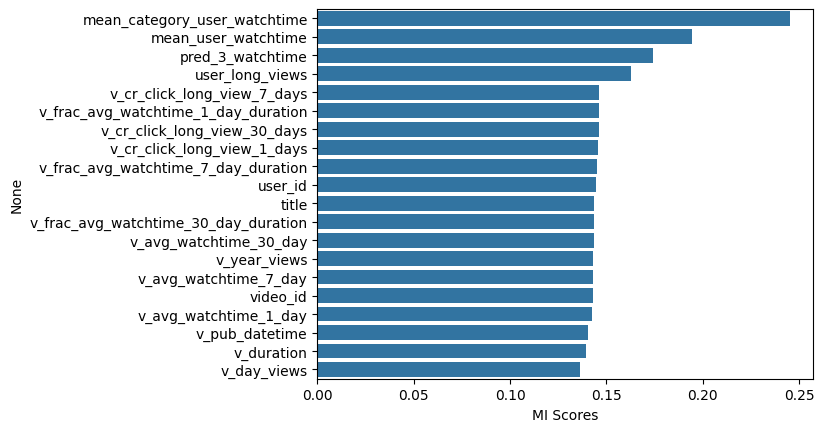

In [40]:
plot_mi_scores(mi_scores.head(20))

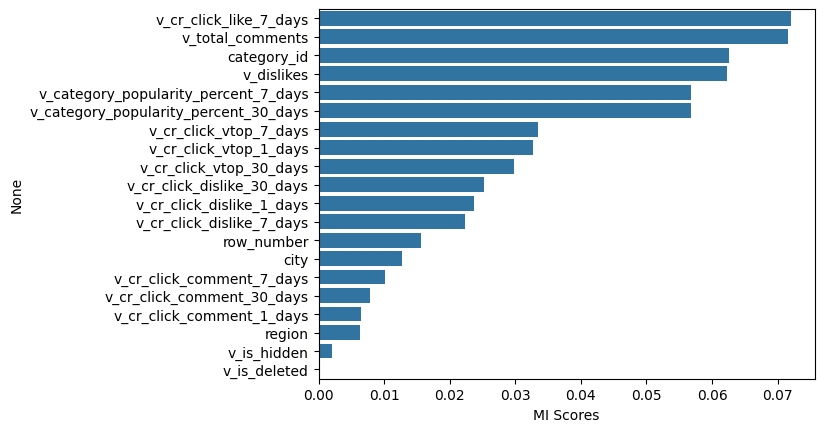

In [41]:
plot_mi_scores(mi_scores.tail(20))

In [111]:
df_train_merged.drop(columns=['row_number', 'v_is_deleted', 'v_is_hidden',
							  'city', 'region'], inplace=True)

df_test_merged.drop(columns=['row_number', 'v_is_deleted', 'v_is_hidden',
							  'city', 'region'], inplace=True)

In [7]:
new_features = pd.DataFrame()

new_features['all_watchtime_predicted'] = df_train_merged['v_year_views'] *\
								   df_train_merged['v_avg_watchtime_7_day']

new_features['watchtime_temp'] = df_train_merged['v_avg_watchtime_1_day'] /\
									(df_train_merged['v_avg_watchtime_7_day'] + 1e-3)
new_features['popularity_temp'] = df_train_merged['v_day_views'] /\
									(df_train_merged['v_week_views'] + 1e-3)

new_features_test = pd.DataFrame()

new_features_test['all_watchtime_predicted'] = df_test_merged['v_year_views'] *\
								   df_test_merged['v_avg_watchtime_7_day']

new_features_test['watchtime_temp'] = df_test_merged['v_avg_watchtime_1_day'] /\
									(df_test_merged['v_avg_watchtime_7_day'] + 1e-3)
new_features_test['popularity_temp'] = df_test_merged['v_day_views'] /\
									(df_test_merged['v_week_views'] + 1e-3)




In [9]:
df_train_merged = pd.concat([df_train_merged, new_features], axis=1)
df_test_merged = pd.concat([df_test_merged, new_features_test], axis=1)
df_train_merged.head()

,event_timestamp,user_id,region,city,video_id,watchtime,v_pub_datetime,v_total_comments,v_year_views,v_month_views,...,v_long_views_7_days,v_long_views_30_days,row_number,title,description,category_id,author_id,all_watchtime_predicted,watchtime_temp,popularity_temp
0,2024-08-10 20:13:12+03:00,73dadec9-9189-43a8-a32f-906e549af7e0,13925c13-0e77-4548-acdc-09aa728e31d4,faeecbed-060a-4d40-be81-ce3bac90804c,98380888-2d8a-4d2f-9660-a00c3c5c0512,0,2023-11-14 14:35:33,282,13178,3104,...,1750,1750,1,САМЫЕ ПОПУЛЯРНЫЕ МАЙНКРАФТ ШОРТСЫ НА ЮТУБЕ!!!,▶️ МОЙ БОТ ДЛЯ ДОНАТА В ИГРЫ - ▶️ Telegram - ▶...,Лайфстайл,92730768-b602-4905-8ac0-d9b592f99bfd,8.723976e+06,0.999998,1.0
1,2024-08-10 14:01:33+03:00,41f61d78-7fa8-43f1-82a6-00a8f6dff97f,7b68bf56-4b73-44a9-a16e-9b0314fccf48,ed738b3d-622d-43bc-8e13-62f13399b698,98380888-2d8a-4d2f-9660-a00c3c5c0512,38,2023-11-14 14:35:33,282,13178,3104,...,1750,1750,1,САМЫЕ ПОПУЛЯРНЫЕ МАЙНКРАФТ ШОРТСЫ НА ЮТУБЕ!!!,▶️ МОЙ БОТ ДЛЯ ДОНАТА В ИГРЫ - ▶️ Telegram - ▶...,Лайфстайл,92730768-b602-4905-8ac0-d9b592f99bfd,8.723976e+06,0.999998,1.0
2,2024-08-10 10:04:41+03:00,33561547-5f57-4e32-8929-7d6a05e4b6a4,7d0eb6c0-242f-404b-a862-bc6630ddb4b3,78d7f303-b196-4da1-b893-9928c424d20a,98380888-2d8a-4d2f-9660-a00c3c5c0512,1319,2023-11-14 14:35:33,282,13178,3104,...,1750,1750,1,САМЫЕ ПОПУЛЯРНЫЕ МАЙНКРАФТ ШОРТСЫ НА ЮТУБЕ!!!,▶️ МОЙ БОТ ДЛЯ ДОНАТА В ИГРЫ - ▶️ Telegram - ▶...,Лайфстайл,92730768-b602-4905-8ac0-d9b592f99bfd,8.723976e+06,0.999998,1.0
3,2024-08-10 00:34:38+03:00,a817239d-baf1-4e1e-9870-f9a904247321,c177434f-aa21-4800-9f97-5dbcffc5023c,660a1afb-39ad-42b3-9741-f9a885cdd4a9,98380888-2d8a-4d2f-9660-a00c3c5c0512,1440,2023-11-14 14:35:33,282,13178,3104,...,1750,1750,1,САМЫЕ ПОПУЛЯРНЫЕ МАЙНКРАФТ ШОРТСЫ НА ЮТУБЕ!!!,▶️ МОЙ БОТ ДЛЯ ДОНАТА В ИГРЫ - ▶️ Telegram - ▶...,Лайфстайл,92730768-b602-4905-8ac0-d9b592f99bfd,8.723976e+06,0.999998,1.0
4,2024-08-10 03:25:08+03:00,e9447ffc-a4c1-4a32-a604-cdd576ee8635,8a1576ff-110b-4850-b298-6a00f369d973,a196ac61-fd1a-4269-918b-ffe2cc2a9519,98380888-2d8a-4d2f-9660-a00c3c5c0512,1420,2023-11-14 14:35:33,282,13178,3104,...,1750,1750,1,САМЫЕ ПОПУЛЯРНЫЕ МАЙНКРАФТ ШОРТСЫ НА ЮТУБЕ!!!,▶️ МОЙ БОТ ДЛЯ ДОНАТА В ИГРЫ - ▶️ Telegram - ▶...,Лайфстайл,92730768-b602-4905-8ac0-d9b592f99bfd,8.723976e+06,0.999998,1.0


In [11]:
del df_try
del df_users_info
del df_try2

NameError: name 'df_try' is not defined

In [39]:
df_test_merged.isna().sum()

event_timestamp                          0
user_id                                  0
video_id                                 0
v_pub_datetime                           0
v_total_comments                         0
v_year_views                             0
v_month_views                            0
v_week_views                             0
v_day_views                              0
v_likes                                  0
v_dislikes                               0
v_duration                               0
v_cr_click_like_7_days                   0
v_cr_click_dislike_7_days                0
v_cr_click_vtop_7_days                   0
v_cr_click_long_view_7_days              0
v_cr_click_comment_7_days                0
v_cr_click_like_30_days                  0
v_cr_click_dislike_30_days               0
v_cr_click_vtop_30_days                  0
v_cr_click_long_view_30_days             0
v_cr_click_comment_30_days               0
v_cr_click_like_1_days                   0
v_cr_click_

In [10]:
df_train_merged = df_train_merged.sample(frac=1)

In [8]:
df_train_merged.head()

,event_timestamp,user_id,region,city,video_id,watchtime,v_pub_datetime,v_total_comments,v_year_views,v_month_views,...,v_category_popularity_percent_7_days,v_category_popularity_percent_30_days,v_long_views_1_days,v_long_views_7_days,v_long_views_30_days,row_number,title,description,category_id,author_id
0,2024-08-10 20:13:12+03:00,73dadec9-9189-43a8-a32f-906e549af7e0,13925c13-0e77-4548-acdc-09aa728e31d4,faeecbed-060a-4d40-be81-ce3bac90804c,98380888-2d8a-4d2f-9660-a00c3c5c0512,0,2023-11-14 14:35:33,282,13178,3104,...,9.614708,9.614708,1750,1750,1750,1,САМЫЕ ПОПУЛЯРНЫЕ МАЙНКРАФТ ШОРТСЫ НА ЮТУБЕ!!!,▶️ МОЙ БОТ ДЛЯ ДОНАТА В ИГРЫ - ▶️ Telegram - ▶...,Лайфстайл,92730768-b602-4905-8ac0-d9b592f99bfd
1,2024-08-10 14:01:33+03:00,41f61d78-7fa8-43f1-82a6-00a8f6dff97f,7b68bf56-4b73-44a9-a16e-9b0314fccf48,ed738b3d-622d-43bc-8e13-62f13399b698,98380888-2d8a-4d2f-9660-a00c3c5c0512,38,2023-11-14 14:35:33,282,13178,3104,...,9.614708,9.614708,1750,1750,1750,1,САМЫЕ ПОПУЛЯРНЫЕ МАЙНКРАФТ ШОРТСЫ НА ЮТУБЕ!!!,▶️ МОЙ БОТ ДЛЯ ДОНАТА В ИГРЫ - ▶️ Telegram - ▶...,Лайфстайл,92730768-b602-4905-8ac0-d9b592f99bfd
2,2024-08-10 10:04:41+03:00,33561547-5f57-4e32-8929-7d6a05e4b6a4,7d0eb6c0-242f-404b-a862-bc6630ddb4b3,78d7f303-b196-4da1-b893-9928c424d20a,98380888-2d8a-4d2f-9660-a00c3c5c0512,1319,2023-11-14 14:35:33,282,13178,3104,...,9.614708,9.614708,1750,1750,1750,1,САМЫЕ ПОПУЛЯРНЫЕ МАЙНКРАФТ ШОРТСЫ НА ЮТУБЕ!!!,▶️ МОЙ БОТ ДЛЯ ДОНАТА В ИГРЫ - ▶️ Telegram - ▶...,Лайфстайл,92730768-b602-4905-8ac0-d9b592f99bfd
3,2024-08-10 00:34:38+03:00,a817239d-baf1-4e1e-9870-f9a904247321,c177434f-aa21-4800-9f97-5dbcffc5023c,660a1afb-39ad-42b3-9741-f9a885cdd4a9,98380888-2d8a-4d2f-9660-a00c3c5c0512,1440,2023-11-14 14:35:33,282,13178,3104,...,9.614708,9.614708,1750,1750,1750,1,САМЫЕ ПОПУЛЯРНЫЕ МАЙНКРАФТ ШОРТСЫ НА ЮТУБЕ!!!,▶️ МОЙ БОТ ДЛЯ ДОНАТА В ИГРЫ - ▶️ Telegram - ▶...,Лайфстайл,92730768-b602-4905-8ac0-d9b592f99bfd
4,2024-08-10 03:25:08+03:00,e9447ffc-a4c1-4a32-a604-cdd576ee8635,8a1576ff-110b-4850-b298-6a00f369d973,a196ac61-fd1a-4269-918b-ffe2cc2a9519,98380888-2d8a-4d2f-9660-a00c3c5c0512,1420,2023-11-14 14:35:33,282,13178,3104,...,9.614708,9.614708,1750,1750,1750,1,САМЫЕ ПОПУЛЯРНЫЕ МАЙНКРАФТ ШОРТСЫ НА ЮТУБЕ!!!,▶️ МОЙ БОТ ДЛЯ ДОНАТА В ИГРЫ - ▶️ Telegram - ▶...,Лайфстайл,92730768-b602-4905-8ac0-d9b592f99bfd


In [12]:
data = df_train_merged.drop(columns=['title',
									 'description',
									 'author_id',
									 'video_id',
									 'user_id'])
#data['category_id'] = df_train_merged['category_id']
test_data = df_test_merged.drop(columns=['title',
									 'description',
									 'author_id',
									 'video_id',
									 'user_id'])
#test_data['category_id'] = df_test_merged['category_id']
data.head()

,event_timestamp,region,city,watchtime,v_pub_datetime,v_total_comments,v_year_views,v_month_views,v_week_views,v_day_views,...,v_category_popularity_percent_7_days,v_category_popularity_percent_30_days,v_long_views_1_days,v_long_views_7_days,v_long_views_30_days,row_number,category_id,all_watchtime_predicted,watchtime_temp,popularity_temp
6814927,2024-08-10 14:39:47+03:00,d7c6be26-f823-4c5e-83fc-c1446ef917a9,11fe7424-ab1c-40c4-a6bf-73c2f1eacb2f,288,2024-07-03 06:00:09,167,502,502,502,502,...,0.401692,0.401692,186,186,186,1,Интервью,9.993300e+05,0.999999,0.999998
155325,2024-08-10 05:22:48+03:00,721508f0-c381-42cb-96ce-dc1deaf8739f,12a89fab-6dd5-4f2b-a358-c4b755ba487b,61,2009-12-31 21:00:01,2,657845,21,21,21,...,5.532969,5.532969,8,8,8,1,Телепередачи,1.851364e+07,0.999964,0.999952
12788798,2024-08-10 12:06:56+03:00,13925c13-0e77-4548-acdc-09aa728e31d4,65b094ef-3283-4f51-8eab-a12750c7d031,71,2022-02-20 07:32:15,0,396,88,88,88,...,4.296274,4.296274,74,74,74,1,Мультфильмы,2.390400e+04,0.999983,0.999989
11262659,2024-08-10 07:50:15+03:00,7d0eb6c0-242f-404b-a862-bc6630ddb4b3,78d7f303-b196-4da1-b893-9928c424d20a,421,2021-11-11 09:00:10,0,1502,83,83,83,...,6.377373,6.377373,65,65,65,1,Детям,4.717728e+05,0.999997,0.999988
3192496,2024-08-10 09:19:30+03:00,84bbe8bc-6a18-4ce3-ab05-78090da1780b,5abb2dfc-9577-43d5-aaad-f47e280f6f59,11,2009-12-31 21:00:01,6,73425,145,145,145,...,3.171863,3.171863,84,84,84,1,Музыка,5.432944e+06,0.999986,0.999993


In [22]:
(data['target'] == 1).sum()

267085

In [23]:
(data['target'] == 0).sum()

232915

In [146]:
from sklearn.model_selection import KFold
from catboost import CatBoostClassifier

def cross_val(X : pd.DataFrame, y : pd.Series, n_splits=5,
			   model=CatBoostRegressor(verbose=500), verbose=True):
	X = X.copy()
	kf = KFold(n_splits = n_splits)
	scores = []
	for i, (train_index, test_index) in enumerate(kf.split(X, y)):
		X_train, y_train, X_test, y_test = X.iloc[train_index], y.iloc[train_index], \
										   X.iloc[test_index], y.iloc[test_index]
		model.fit(X_train, y_train)
		y_pred = model.predict(X_test)
		scores.append(mean_absolute_error(y_test, y_pred))
		if verbose:
			print(f"{i} score - {scores[-1]}")
	if verbose:
		print(f"MEAN SCORE: {sum(scores) / n_splits}")
	return sum(scores) / n_splits

In [10]:
X_train, y_train = data.drop(columns='watchtime') , data['watchtime']

In [148]:
from sklearn.linear_model import Ridge


def objective(trial):
    print(mean_absolute_error([6, 6], [5, 5]))

    params = {
        "alpha" : trial.suggest_float("alpha", 0.001, 10)
    }
    model = Ridge(**params)
    return cross_val(X_train, y_train, model=model, verbose=False)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)


[I 2024-10-19 02:18:36,785] A new study created in memory with name: no-name-ecb0d0ea-a7d2-4801-aeda-32dbf4ca6cad


1.0


[I 2024-10-19 02:18:37,256] Trial 0 finished with value: 995.5900146462167 and parameters: {'alpha': 0.5529741456067919}. Best is trial 0 with value: 995.5900146462167.


1.0


[I 2024-10-19 02:18:37,744] Trial 1 finished with value: 995.59001474666 and parameters: {'alpha': 6.298430893963638}. Best is trial 0 with value: 995.5900146462167.


1.0


[I 2024-10-19 02:18:38,289] Trial 2 finished with value: 995.5900146564676 and parameters: {'alpha': 1.1393352184997745}. Best is trial 0 with value: 995.5900146462167.


1.0


[I 2024-10-19 02:18:38,781] Trial 3 finished with value: 995.5900146603824 and parameters: {'alpha': 1.363268044361321}. Best is trial 0 with value: 995.5900146462167.


1.0


[I 2024-10-19 02:18:39,253] Trial 4 finished with value: 995.5900147648872 and parameters: {'alpha': 7.341054289603145}. Best is trial 0 with value: 995.5900146462167.


1.0


[I 2024-10-19 02:18:39,740] Trial 5 finished with value: 995.5900146811786 and parameters: {'alpha': 2.552827395166366}. Best is trial 0 with value: 995.5900146462167.


1.0


[I 2024-10-19 02:18:40,221] Trial 6 finished with value: 995.5900147337986 and parameters: {'alpha': 5.562751618702511}. Best is trial 0 with value: 995.5900146462167.


1.0


[I 2024-10-19 02:18:40,744] Trial 7 finished with value: 995.5900147840046 and parameters: {'alpha': 8.434592409289218}. Best is trial 0 with value: 995.5900146462167.


1.0


[I 2024-10-19 02:18:41,203] Trial 8 finished with value: 995.5900147360462 and parameters: {'alpha': 5.691312952095103}. Best is trial 0 with value: 995.5900146462167.


1.0


[I 2024-10-19 02:18:41,681] Trial 9 finished with value: 995.5900146829019 and parameters: {'alpha': 2.6514021575927735}. Best is trial 0 with value: 995.5900146462167.


In [187]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, SGDRegressor, Ridge
from sklearn.pipeline import make_pipeline


cross_val(X_train, y_train,
		   model=LinearRegression())

0 score - 900.2356721860976
1 score - 905.0135541278413
2 score - 904.9133232419036
3 score - 859.3057388876379
4 score - 897.20102362226
MEAN SCORE: 893.333862413148


893.333862413148

In [ ]:
from lightautoml.report.report_deco import ReportDeco
N_THREADS = 8
N_FOLDS = 5
RANDOM_STATE = 7
TIMEOUT = 1800
TEST_SIZE = 0.2

task = Task(
    name='reg',
    loss='mse',
    metric='mae'
)

roles = {
    'target': 'watchtime'
    
}


automl = TabularAutoML(task = task, 
                       timeout = TIMEOUT,
                       cpu_limit = N_THREADS,
                       reader_params = {'n_jobs': N_THREADS, 'cv': N_FOLDS, 'random_state': RANDOM_STATE},
                       general_params = {'use_algos': [['lgb', 'lgb_tuned']]},
                       selection_params = {'mode': 0}
                      )

RD = ReportDeco(output_path = 'tabularAutoML_model_report')
automl_rd = RD(automl)

oof_pred = automl_rd.fit_predict(data, roles = roles)

In [14]:
print(automl.create_model_str_desc())

Final prediction for new objects (level 0) = 
	 0.65049 * (5 averaged models Lvl_0_Pipe_0_Mod_0_LightGBM) +
	 0.34951 * (5 averaged models Lvl_0_Pipe_0_Mod_1_Tuned_LightGBM) 


In [181]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [4]:
cat_features = ['category_id']

In [116]:
data.to_csv("batch_train/full", index=False)
test_data.to_csv("batch_train/test_full", index=False)

In [2]:
data = pd.read_csv("batch_train/full").iloc[:500000]
test_data = pd.read_csv("batch_train/test_full")

In [25]:
data.head()

,v_pub_datetime,v_total_comments,v_year_views,v_month_views,v_week_views,v_day_views,v_likes,v_dislikes,v_duration,v_cr_click_like_7_days,...,v_long_views_30_days,target,mean_user_watchtime,user_long_views,pred_3_watchtime,mean_category_user_watchtime,watchtime_ratio,all_watchtime_predicted,watchtime_temp,popularity_temp
0,0.953291,282,13178,3104,3104,3104,1824,32,1426.263,0.773196,...,1750,0,978.6,3.0,805.333333,0.000000,0.000000,8.723976e+06,0.999998,1.000000
1,0.899664,54,12096,3287,3287,3287,982,11,893.528,0.882263,...,2580,0,978.6,3.0,805.333333,805.333333,1.277304,7.626453e+06,0.999998,1.000000
2,0.917100,124,10648,1518,1518,1518,1321,11,1800.801,1.054018,...,693,1,978.6,3.0,805.333333,805.333333,1.276495,6.717752e+06,0.999998,0.999999
3,0.920822,75,5802,1078,1078,1078,402,2,1255.411,0.649351,...,563,1,978.6,3.0,805.333333,805.333333,1.508925,3.096600e+06,0.999998,0.999999
4,0.959979,17,43285,1160,1160,1160,307,6,2572.480,0.172414,...,761,1,978.6,3.0,805.333333,2477.000000,1.713116,6.258589e+07,0.999999,0.999999


In [4]:

train, valid = train_test_split(data, test_size=0.25, random_state=42, shuffle=True)


In [ ]:
# ТОЛЬКО ДЛЯ ТРЕНИРОВКИ ПО БАТЧАМ
i = 0
while (i - 1) * 500000 < train.shape[0]:
	batch = train.iloc[i*500000 : i * 500000 + 500000]
	batch.to_csv(f"batch_train/batch_{i}", index=False)
	i += 1
	print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [53]:
del df_train_merged
del data

In [ ]:
# ТОЛЬКО ДЛЯ ТРЕНИРОВКИ ПО БАТЧАМ
params = {
        "verbose" : 0,
        "iterations": 600,
        "depth": 4,
        "subsample": 0.44,
        "colsample_bylevel": 0.87,
        "cat_features" : cat_features
}

models = []

for i in range(29):
	data2 = pd.read_csv(f'batch_train/batch_{i}')
	
	X_train, y_train = data2.drop(columns='watchtime'), train['watchtime']

	cbst = CatBoostRegressor(**params)

	cbst.fit(X_train, y_train)
	models.append(cbst)
	del data2
	print(i + 1)


Learning rate set to 0.386491
0:	learn: 846.0250175	total: 159ms	remaining: 31.6s
50:	learn: 650.9279662	total: 9.68s	remaining: 28.3s
100:	learn: 645.6937656	total: 20.5s	remaining: 20.1s
150:	learn: 642.1047423	total: 29.6s	remaining: 9.6s
199:	learn: 639.2239649	total: 38.7s	remaining: 0us
Learning rate set to 0.386491
0:	learn: 847.3042539	total: 168ms	remaining: 33.5s
50:	learn: 652.1970467	total: 9.12s	remaining: 26.7s
100:	learn: 647.0548510	total: 18.1s	remaining: 17.8s
150:	learn: 643.1478699	total: 27.2s	remaining: 8.81s
199:	learn: 640.2714406	total: 35.9s	remaining: 0us
Learning rate set to 0.386491
0:	learn: 847.0812163	total: 132ms	remaining: 26.2s
50:	learn: 653.5990087	total: 9.48s	remaining: 27.7s
100:	learn: 647.9994435	total: 18.7s	remaining: 18.3s
150:	learn: 644.3069840	total: 27.6s	remaining: 8.96s
199:	learn: 641.0424429	total: 36.1s	remaining: 0us
Learning rate set to 0.386491
0:	learn: 849.7693555	total: 133ms	remaining: 26.5s
50:	learn: 650.7563362	total: 8.99

In [55]:
data2.head()

,watchtime,v_total_comments,v_year_views,v_month_views,v_week_views,v_day_views,v_likes,v_dislikes,v_duration,v_cr_click_like_7_days,...,v_frac_avg_watchtime_30_day_duration,v_category_popularity_percent_7_days,v_category_popularity_percent_30_days,v_long_views_1_days,v_long_views_7_days,v_long_views_30_days,mean_category_user_watchtime,mean_user_watchtime,pred_3_watchtime,category_id
0,384,0,973,3,3,3,1,1,384.552,0.000000,...,0.158626,3.171863,3.171863,1,1,1,194.000000,108.250000,132.000000,Музыка
1,4,0,1310,13,13,13,9,1,234.335,0.000000,...,0.463505,3.171863,3.171863,12,12,12,194.000000,108.250000,132.000000,Музыка
2,8,194,1805,1805,1805,1805,2356,15,3875.009,0.886427,...,0.479512,0.609148,0.609148,1026,1026,1026,8.000000,108.250000,132.000000,Культура
3,37,0,110,2,2,2,2,0,5662.256,0.000000,...,0.138814,1.073461,1.073461,1,1,1,37.000000,108.250000,132.000000,Спорт
4,110,1,948,710,710,710,29,5,44712.508,0.000000,...,0.085103,3.429629,3.429629,66,66,66,38.666667,40.857143,38.666667,Разное


In [ ]:
X_train, y_train = train.drop(columns='target'), train['target']

X_valid, y_valid = valid.drop(columns='target'), valid['target']
cbst1 = CatBoostClassifier(**params)

cbst1.fit(X_train, y_train)

Learning rate set to 0.299886
0:	learn: 0.5930427	total: 183ms	remaining: 1m 12s
50:	learn: 0.4463477	total: 1.62s	remaining: 11.1s
100:	learn: 0.4392854	total: 2.98s	remaining: 8.81s
150:	learn: 0.4351277	total: 4.31s	remaining: 7.11s
200:	learn: 0.4325426	total: 5.67s	remaining: 5.61s
250:	learn: 0.4305782	total: 7.04s	remaining: 4.18s
300:	learn: 0.4286930	total: 8.55s	remaining: 2.81s
350:	learn: 0.4271819	total: 9.87s	remaining: 1.38s
399:	learn: 0.4259335	total: 11.1s	remaining: 0us


In [7]:
pd.Series(cbst1.feature_importances_, X_train.columns).sort_values(ascending=False)

watchtime_ratio                          25.243241
mean_category_user_watchtime             19.660186
v_duration                               11.569752
user_long_views                           9.467160
v_cr_click_long_view_7_days               5.575042
v_cr_click_long_view_30_days              4.832623
v_frac_avg_watchtime_7_day_duration       4.070462
mean_user_watchtime                       2.596506
v_pub_datetime                            2.501980
v_category_popularity_percent_30_days     2.110090
v_avg_watchtime_7_day                     1.491019
pred_3_watchtime                          1.202880
all_watchtime_predicted                   1.061969
v_category_popularity_percent_7_days      0.957626
v_frac_avg_watchtime_1_day_duration       0.912375
v_dislikes                                0.665373
v_year_views                              0.659985
v_frac_avg_watchtime_30_day_duration      0.615026
v_total_comments                          0.497166
popularity_temp                

In [21]:
def predict_ensemble(data, models):
	preds = []
	for i, model in enumerate(models):
		preds.append(model.predict(data))

	final_pred = sum(preds) / len(preds)
	
	return final_pred

def to_classes(df_preds: pd.DataFrame) -> pd.DataFrame:
	df = df_preds.copy()
	new_colon = []
	for i in range(df.shape[0]):
		if df_test_merged['v_duration'].iloc[i] > 5 * 60:
			new_colon.append(1 if df['target'].iloc[i] / df_test_merged['v_duration'].iloc[i] > 0.25 else 0)
		else:
			new_colon.append(1 if df['target'].iloc[i] > 30 else 0)
	print(new_colon[-1])
	df['target'] = new_colon
	return df

In [ ]:
X_valid, y_valid = valid.drop(columns='watchtime'), valid['watchtime']

In [122]:



preds = cbst1.predict(X_valid)


print(f1_score(y_valid, preds))

0.8372270628492573


In [57]:

print(mean_absolute_error(y_valid, cbst1.predict(X_valid)))


384.9380110597817


In [ ]:
# ТОЛЬКО ДЛЯ ТРЕНИРОВКИ ПО БАТЧАМ
final_pred = predict_ensemble(test_data, models)

In [42]:
test_data.head()

,v_total_comments,v_year_views,v_month_views,v_week_views,v_day_views,v_likes,v_dislikes,v_duration,v_cr_click_like_7_days,v_cr_click_dislike_7_days,...,v_frac_avg_watchtime_30_day_duration,v_category_popularity_percent_7_days,v_category_popularity_percent_30_days,v_long_views_1_days,v_long_views_7_days,v_long_views_30_days,mean_category_user_watchtime,mean_user_watchtime,pred_3_watchtime,category_id
0,23,55123,3822,3822,3822,117,3,411.243,0.052329,0.000000,...,0.776868,6.377373,6.377373,3096,3096,3096,376.333333,403.7,402.333333,Детям
1,6,40791,3636,3636,3636,70,8,419.499,0.082508,0.027503,...,0.781692,6.377373,6.377373,2967,2967,2967,376.333333,403.7,402.333333,Детям
2,1,46662,8114,8114,8114,111,6,400.640,0.110919,0.000000,...,0.822451,6.377373,6.377373,6920,6920,6920,376.333333,403.7,402.333333,Детям
3,2,44122,3548,3548,3548,81,7,419.286,0.000000,0.000000,...,0.781636,4.296274,4.296274,2914,2914,2914,444.750000,403.7,402.333333,Мультфильмы
4,1,39655,2601,2601,2601,81,6,418.774,0.076894,0.000000,...,0.774421,6.377373,6.377373,2158,2158,2158,376.333333,403.7,402.333333,Детям


In [16]:
X_test = test_data.copy()

In [18]:
X_test['watchtime'] = 0

In [19]:
final_pred = automl_rd.predict(X_test)

C:\Users\ignat\AppData\Roaming\Python\Python311\site-packages\lightautoml\report\report_deco.py:322: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data["y_pred"] - data["y_true"], shade=True, color="m", ax=ax)


In [38]:
final_pred = final_pred.data[:, 0]

In [40]:
submit = pd.DataFrame(data={'': test_data.index, 'target': final_pred})
submit = to_classes(submit)
submit.to_csv('submit.csv', index=False)
submit.head()

1


,,target
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1


In [41]:
submit[submit['target'] == 0].shape[0]

321440